### Task 2: Predict Future Stock Prices
#### Problem statement: 
     The objective of this task is to predict the next day’s closing price of a selected stock using historical stock market data
            


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Loading Dataset

In [2]:
#loading historical stock data. I selected stock: Apple (AAPL)
#Downloaded data of last 5years and print its first 5 rows
tick = "AAPL"
data = yf.download(tick, period="5y")
data.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-11-27,113.494804,114.370913,113.134632,113.475339,46691300
2020-11-30,115.889488,117.758515,113.708950,113.864706,169410200
2020-12-01,119.462090,120.192179,116.824034,117.797487,127728200
2020-12-02,119.812531,120.094833,117.680667,118.780666,89004200
2020-12-03,119.676239,120.493935,118.965616,120.240836,78967600


### Spliting features for Training

In [ ]:
#Here i'm creating the target column name Next_lose and droping last row
#Make features x, y(target)
#Split data into train and test sets for model training and evaluation
data['nextClose'] = data['Close'].shift(-1) 
data = data[:-1]

X = data[['Open', 'High', 'Low', 'Volume']]
y = data['nextClose']

"""we set shuffle to False because in time series data we do not mix past or future data
Past data used for training and future data is used for testing"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False) 

### Training Linear Regression Model

In [4]:
#Here i initialize and train the Linear Regression model
#And do prediction on test data
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

### Evaluate Model

In [10]:
#To evaluate the model i calculated its MSEmean square error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 20.47375667582291


### Plot Actual VS Predicted Values

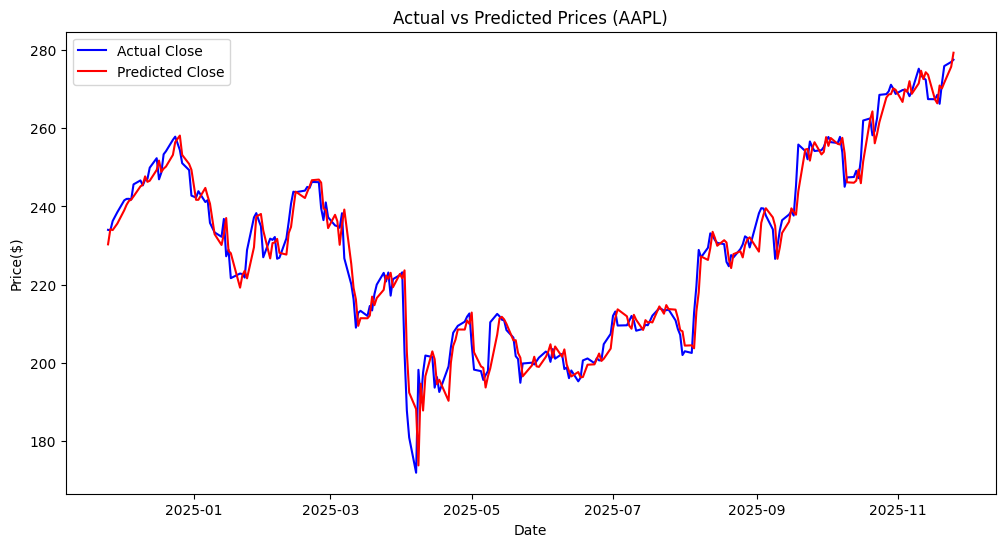

In [6]:
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual Close', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Close', color='red')
plt.xlabel('Date')
plt.ylabel('Price($)')
plt.title('Actual vs Predicted Prices (AAPL)')
plt.legend()
plt.show()


### Final Isights

        The predicted prices closely follow the actual prices.
        The Mean Squared Error (MSE) is low, indicating good prediction accuracy.
        The model performs well in capturing both upward and downward price movements.
        Overall, the model effectively captures price trends with minor fluctuations, making 
            it suitable for short-term trend analysis.